# Challenge of the Week
---
© 2023, Zaka AI, Inc. All Rights Reserved.
## Case Study: Insurance Medical Cost Prediction

**Objective:**

In this exercise, you will explore a dataset of insurance data detailed below. You will build a model from scratch using Gradient Descent to predict the cost of treatment for individuals based on their age, sex, bmi and other information.


## Dataset Description


*   **age**: age of primary beneficiary
*   **sex**: insurance contractor gender, female, male
*   **bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
*   **children**: Number of children covered by health insurance / Number of dependents
*   **smoker**: Smoking
*   **region**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
*   **charges**: Individual medical costs billed by health insurance

## 1. Data Loading

#### Import necessary python modules

We will need the following libraries:
 - Numpy — for scientific computing (e.g., linear algebra (vectors & matrices)).
 - Pandas — providing high-performance, easy-to-use data reading, manipulation, and analysis.
 - Matplotlib — plotting & visualization.
 - scikit-learn — a tool for data mining and machine learning models. We need from this library the functions train_test_split and LinearRegression

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

*(Mounting my drive and changing the directory to where insurance.csv is saved in order to access it)*


In [ ]:
# Mounting google drive to access data sets
from google.colab import drive
drive.mount('/content/drive')

# Changing directory
%cd /content/drive/MyDrive/Colab_Notebooks/ZAKA_AIC /Module2

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab_Notebooks/ZAKA_AIC /Module2


#### Read & visualize data
You should have the dataset on a csv file. To load the data to our code, we use **pandas** module, more specifically, the **read_csv** function.
Then display the head of your dataset

In [ ]:
# Reading the data file
insurance_df = pd.read_csv('insurance.csv')

# Displaying the first rows of the dataset
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 2. Exploratory Data Analysis

Let's dig deeper & understand our data

**Task:** how many rows & columns in our dataset

In [ ]:
# Getting the number of rows and columns in the dataset and printing them
rows = insurance_df.shape[0]
columns = insurance_df.shape[1]

print("The dataset has {} rows and {} columns".format(rows,columns))

The dataset has 1338 rows and 7 columns


Use the function **info()**, to check:
 - data types (int, float, or object (e.g., string))
 - missing values
 - memory usage
 - number of rows and columns

In [ ]:
# Checking for some information about the dataset
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1335 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Use the function **describe()** to can check the mean, standard deviation, maximum, and minimum of each numerical feature (column)

In [ ]:
# Checking statistical values of each column
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1335.000000,1338.000000,1338.000000
mean,39.207025,30.661423,1.094918,13270.422265
std,14.049960,6.101038,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.302500,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.687500,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Distribution of charges

First, let's look at the distribution of charges. This will help us to know how much patients spend on treatment on average.
To do this plot the histogram for the charges

Text(0, 0.5, 'Frequency')

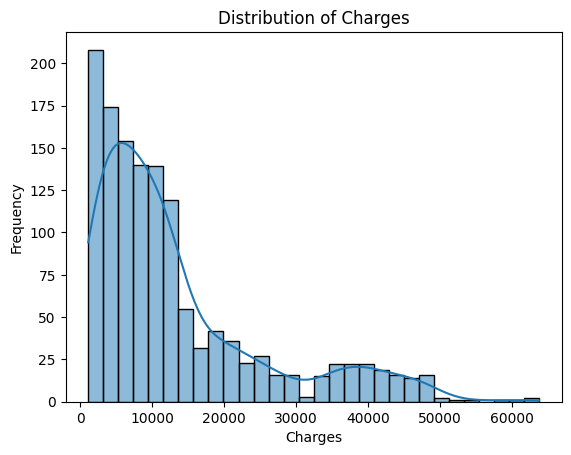

In [ ]:
# Plotting the distribution of charages through a histogram
sns.histplot(data=insurance_df, x="charges" , kde = True )
plt.title("Distribution of Charges")
plt.xlabel("Charges")
plt.ylabel("Frequency")

#### Correlation between smoking and cost of treatment

Let's see if smokers spend more or less on treatment than non-smokers!

First, separate the dataset between 2: smokers and non_smokers, and then see how many smokers vs non-smokers we have.

In [ ]:
# Checking for number of smokers
smokers = insurance_df[(insurance_df.smoker == "yes")]

# Checking for number of non-smokers
non_smokers = insurance_df[(insurance_df.smoker == "no")]

print('There are {} smokers and {} non-smokers.'.format(smokers.shape[0], non_smokers.shape[0]))

There are 274 smokers and 1064 non-smokers.


plot the distribution of charges for both smokers and non smokers

Text(0, 0.5, 'Frequency')

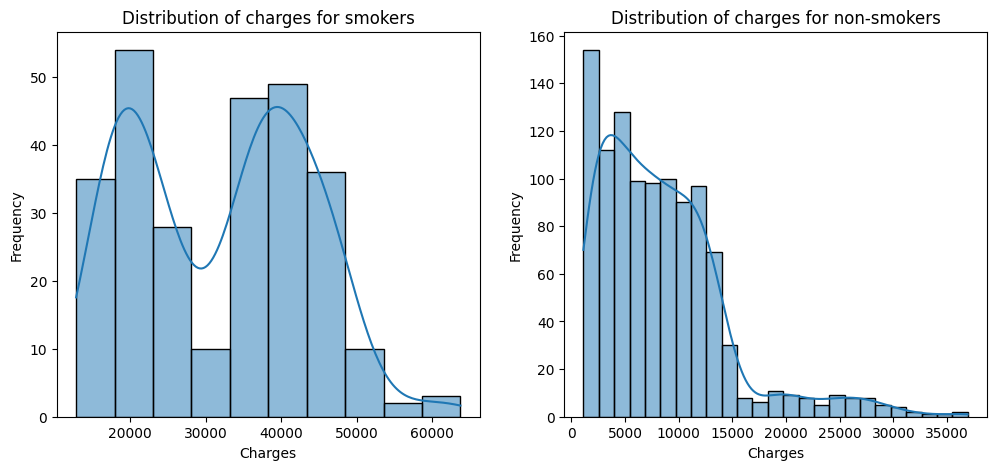

In [ ]:
# Creating the figure
fig = plt.figure(figsize=(12,5))

# Adding first sub plot for smokers
ax = fig.add_subplot(121)
# Drawing distribution of charges for smokers
sns.histplot(data=smokers, x="charges" , kde = True )
# Setting sub plot title(s)
ax.set_title('Distribution of charges for smokers')
ax.set_xlabel('Charges')
ax.set_ylabel('Frequency')


# Adding second sub plot for non smokers
ax = fig.add_subplot(122)
# Drawing distribution of charges for non-smokers
sns.histplot(data=non_smokers, x="charges" , kde = True )
# Setting sub plot title(s)
ax.set_title('Distribution of charges for non-smokers')
ax.set_xlabel('Charges')
ax.set_ylabel('Frequency')

Who spends more on treatment? Smokers or non Smokers?

**As presented in the graphs, somekers tend to spend more chargers on medical bills compared to none smokers.**

#### Correlation between age and cost of treatment

First, plot the distribution of age in our dataset

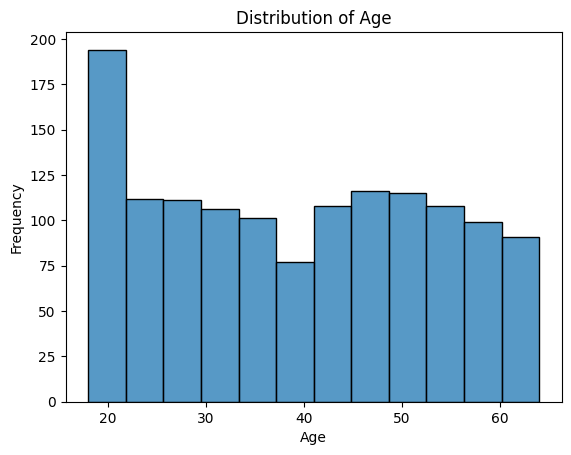

In [ ]:
# Plotting the age distribution through a histogram
sns.histplot(data=insurance_df, x="age" , kde = False)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

plot the correlation between age and cost of treatment

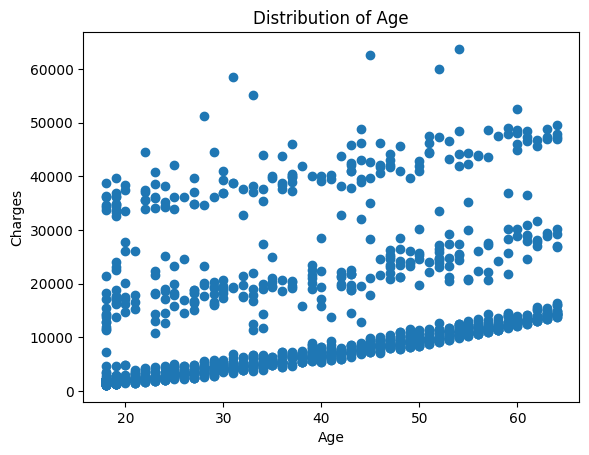

In [ ]:
# Plotting the correlation between age and charges through a scatter plot
plt.scatter(insurance_df["age"],insurance_df["charges"])
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

Let's check if smoking also affects this curve.

**Task**: show a scatter plot with the correlation between age and cost of treatment while showing smokers in red and non-smokers in blue

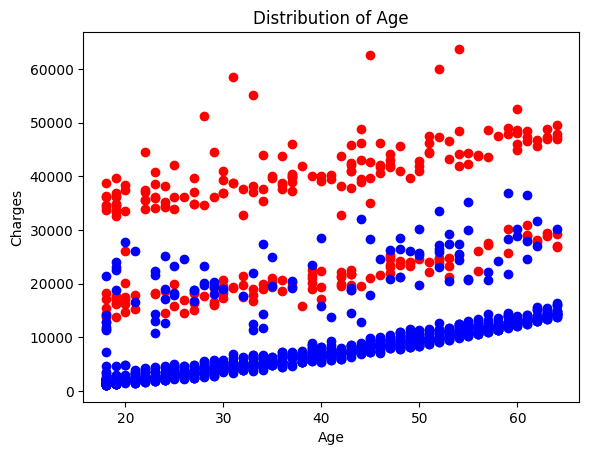

In [ ]:
# Plotting the correlation between age and charges with smokers and non-smokers effect through a scatter plot
plt.scatter(smokers["age"],smokers["charges"], color = 'r')
plt.scatter(non_smokers["age"],non_smokers["charges"], color = 'b')
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

#### Correlation between BMI and cost of treatment

# Body Mass Index

![alt text](https://4.bp.blogspot.com/-nBF9Z1tFGhI/W3MqbdD0j7I/AAAAAAAAAIs/UdyXTIxsBT8Pl8usABxEK_Fusj5S0SnBQCLcBGAs/s1600/HOW%2BTO%2BCALCULATE%2BBODY%2BMASS%2BINDEX%2BBMI.jpg)

# BMI Chart

![BMI char](https://images.squarespace-cdn.com/content/v1/56fae4be1d07c0c393d8faa5/1551103826935-HCXS8U78500C06GQ1PLJ/ke17ZwdGBToddI8pDm48kNMeyc_nGAbaGjp3EBJ2o08UqsxRUqqbr1mOJYKfIPR7LoDQ9mXPOjoJoqy81S2I8N_N4V1vUb5AoIIIbLZhVYxCRW4BPu10St3TBAUQYVKckzCNDuUMr1wTvf7-fqd2hrX5O2-_PoO3UJ2jNU1VzJbe6G9-F0r9BTATNUu-NBMy/BMI+Chart.jpg)

First, plot the distribution of BMI in our dataset.

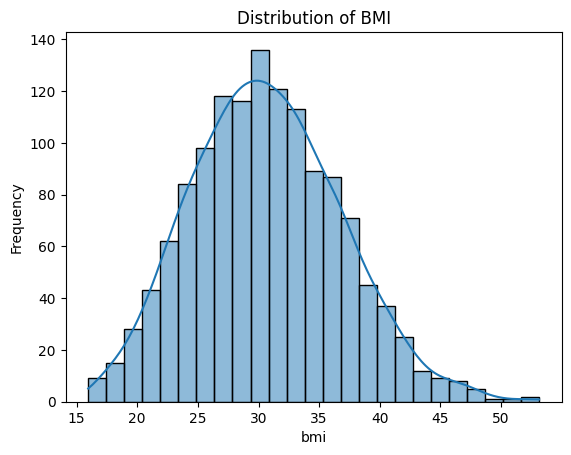

In [ ]:
# Plotting the BMI distribution through a histogram
sns.histplot(data=insurance_df, x="bmi" , kde = True)
plt.title("Distribution of BMI")
plt.xlabel("bmi")
plt.ylabel("Frequency")
plt.show()

According to the chart above, obesity starts at BMI = 30. Let's investigate the impact of BMI on cost of treatment.
Separate the dataset between 4 datasets: one for obese, one for overweight, one for healthy, and one for underweight, and then, give the number of examples that we have for each of those classes.

In [ ]:
# Seperating the dataset into 4 datasets : obese, overweight, healthy, underweight

# Selecting obese data
obese = insurance_df[(insurance_df.bmi >= 30)]

# Selecting overweight data
overweight = insurance_df[(insurance_df.bmi >= 25) & (insurance_df.bmi < 30)]

# Selecting healthy data
healthy = insurance_df[(insurance_df.bmi >= 18) & (insurance_df.bmi < 25)]

# Selecting underweight data
underweight = insurance_df[(insurance_df.bmi < 18)]

print('There are {} obese, {} overweight, {} healthy, and {} underweight individuals.'.format(obese.shape[0], overweight.shape[0], healthy.shape[0], underweight.shape[0]))

There are 705 obese, 385 overweight, 230 healthy, and 15 underweight individuals.


To compare, plot the distribution of charges for all 3 groups (obese, overweight and healthy) in 1 plot, while showing `obese` data in red, `overweight` data in yellow and `healthy` data in green.

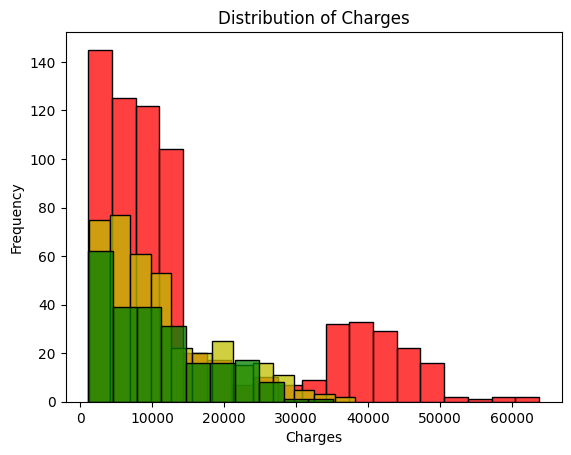

In [ ]:
# Plotting distribution of charges of all three groups
sns.histplot(data=obese, x="charges" , kde = False , color = 'r' )
sns.histplot(data=overweight, x="charges" , kde = False , color = 'y' )
sns.histplot(data=healthy, x="charges" , kde = False , color = 'g' )
plt.title("Distribution of Charges")
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.show()

Patients with BMI above 30 spend more on treatment!

## 3. Data Preprocessing
"Garbage in, garbage out".

Data should be preprocessed and cleaned to get rid of noisy data.
Preprocessing includes:
 - dealing with missing data
   - remove whole rows (if they are not a lot)
   - infer (e.g., date of birth & age)
   - fill with mean, median, or even 0
 - removing unsued column(s)
 - convert categorical (non numerical) data into numerical
 - normalization: standarize data ranges for all features (e.g., between 0 and 1)



---



Start by seeing how many missing data you have in each column

In [ ]:
# Checking num of missing data in each column
insurance_df.isnull().sum()

,0
age,0
sex,0
bmi,3
children,0
smoker,0
region,0
charges,0


drop rows with missing values

In [ ]:
# Dropping rows with missing value
insurance_df = insurance_df.dropna()

# Validating dropped rows
insurance_df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


make sure you don't have any nulls using the info() function

In [ ]:
# Using the info() to check for nulls
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1335 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1335 non-null   int64  
 1   sex       1335 non-null   object 
 2   bmi       1335 non-null   float64
 3   children  1335 non-null   int64  
 4   smoker    1335 non-null   object 
 5   region    1335 non-null   object 
 6   charges   1335 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.4+ KB


#### Remove unused columns

Let's remove the `region` column since we don't really care about it

In [ ]:
# Removing the region column
insurance_df.drop("region", axis=1, inplace=True)
insurance_df.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


#### Convert Categorical columns to numerical

*   We need to convert the sex column from male/female to 0/1.
*   We need to convert the smoker column from no/yes to 0/1.


Let's start with the sex column



In [ ]:
insurance_df['sex'] = insurance_df['sex'].map({'male': 0, 'female': 1})
insurance_df.head()

,age,sex,bmi,children,smoker,charges
0,19,1,27.900,0,yes,16884.92400
1,18,0,33.770,1,no,1725.55230
2,28,0,33.000,3,no,4449.46200
3,33,0,22.705,0,no,21984.47061
4,32,0,28.880,0,no,3866.85520


And now the smokers column

In [ ]:
insurance_df['smoker'] = insurance_df['smoker'].map({'no': 0, 'yes': 1})
insurance_df.head()

,age,sex,bmi,children,smoker,charges
0,19,1,27.900,0,1,16884.92400
1,18,0,33.770,1,0,1725.55230
2,28,0,33.000,3,0,4449.46200
3,33,0,22.705,0,0,21984.47061
4,32,0,28.880,0,0,3866.85520


#### Normalization

Let's scale all the columns by dividing by the maximum

First get the maximum of each column

In [ ]:
# Getting the max of each column
data_max = insurance_df.max()
data_max

,0
age,64.00000
sex,1.00000
bmi,53.13000
children,5.00000
smoker,1.00000
charges,63770.42801


Divide each column by its maximum value

In [ ]:
# Dividing each column by its maximum value
insurance_df = insurance_df.divide(data_max)

insurance_df.describe()

,age,sex,bmi,children,smoker,charges
count,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000,1335.000000
mean,0.612441,0.495131,0.577102,0.219476,0.205243,0.208299
std,0.219491,0.500164,0.114832,0.241145,0.404031,0.190041
min,0.281250,0.000000,0.300395,0.000000,0.000000,0.017592
25%,0.421875,0.000000,0.495059,0.000000,0.000000,0.074365
50%,0.609375,0.000000,0.572181,0.200000,0.000000,0.147187
75%,0.796875,1.000000,0.652880,0.400000,0.000000,0.262144
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 4. MultiLinear Regression Model Training



#### Data splits

Before training, we need to split data into training (80%) & testing (20%) using a random_state of 42.
Print the shape of your training and testing data.

In [ ]:
# Storing all columns except [charges]
x = insurance_df.iloc[:,0:-1].values
# Storing [charges] as y
y = insurance_df.iloc[:,-1].values

# Spiliting dataset into a 80/20 split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1068, 5) (1068,)
(267, 5) (267,)


### Optimization Using Gradient Descent

We remind you that this is a multi linear regression problem <br>
* The equation is y = **a0** + **a1** * x1 + **a2** * x2 + **a3** * x3 + **a4** * x4 + **a5** * x5 <br>
In other words, we have the following: <br>
* charges = **a0** + **a1** * age + **a2** * sex + **a3** * bmi + **a4** * children + **a5** * smoker
*   We call the numpy vector a the vector containing the parameters a = [a0, a1, a2, a3, a4, a5]
* The goal is to find the best vector a


Implement the function Gradient_descent that has the following specifications. Beware of the naming of the variables

In [ ]:
def Gradient_descent(x, y, learning_rate, nb_iterations, initial_a):
    # Initializing parameters
    x = np.array(x)
    n = x.shape[0]
    a = initial_a
    NumFeatures = x.shape[1] # to get the number of columns

    costs = []  # To store the cost at each iteration

    for i in range(nb_iterations):

      y_pred = a[0] + np.sum(a[1:] * x, axis=1)

      error = y_pred - y #It should be y - y_pred (original value minus guess)

      cost = (1/(2*n)) * np.sum((error)**2)  # Computing the cost using MSE
      costs.append(cost)

      dre_a0 = np.sum(error) / n   # derivative of intercept term

      der_a = np.zeros(NumFeatures)  # derivative of all other coefficients

      for j in range(NumFeatures):
        der_a[j] = np.sum(error * x[:,j]) / n

      a[0] -= learning_rate * dre_a0    # Updating intercept term

      for j in range(NumFeatures):
        a[j+1] -= learning_rate * der_a[j]  # Updating coefficients


    return costs, np.array(a)


Now that we have the function ready, we can use it to obtain the optimum coefficient values, and use them for future predictions.

Initialize the number of iteration as 10000, and the learning rate as 0.1. Then write the model equation you obtained

In [ ]:
#Initializing the intercept and coefficients with very small numbers
np.random.seed(42)
initial_a = np.random.rand(x_train.shape[1] + 1) * 0.01   # + 1 for the intercept

learning_rate = 0.1
nb_iterations = 10000

costs, a = Gradient_descent(x_train, y_train, learning_rate, nb_iterations, initial_a)

# Printing the model equation
print("The equation of the model is: \ncharges = {} + {} * age + {} * sex + {} * bmi + {} * children + {} * smoker".format(a[0], a[1], a[2], a[3], a[4], a[5]))

The equation of the model is: 
charges = -0.1773022874485585 + 0.25340085037817783 * age + 0.006362706200033643 * sex + 0.2468277018296399 * bmi + 0.042541986183577116 * children + 0.3666137516531503 * smoker


Plot the cost function

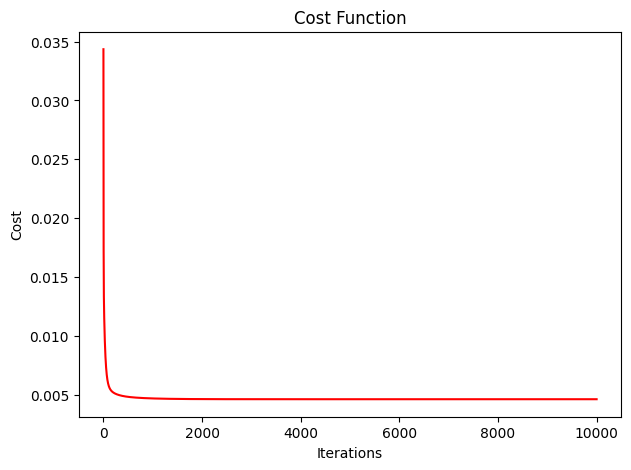

In [ ]:
# Plotting the cost funtion
plt.figure(figsize=(7,5))
plt.plot(range(len(costs)), costs, color = 'red')
plt.title("Cost Function")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()

###Predicting Using Vectorized Gradient Descent

Of course you noted some redundancy in the Gradient Descent implementation, this is why we opt to use a vectorized notation that might be a bit more difficult, but the concept remains the same.
This representation will be useful especially when your number of features starts to increase!

In [ ]:
def Gradient_descent_vectorized (x, y, learning_rate, nb_iterations, initial_a):

    # Initializing parameters
    n = x.shape[0]
    a = initial_a

    costs = []

    # Concatinating a column of ones to x (to deal with intercept term)
    x = np.c_[np.ones((n, 1)), x]

    for i in range(nb_iterations):

        y_pred = np.dot(x, a)  # Vectorized prediction

        # Computing the error
        error = y_pred - y

        # Computing the cost using MSE
        cost = (1 / (2 * n)) * np.sum(error ** 2)
        costs.append(cost)

        # Calculating the derivatives (vectorized)
        der_a = (1 / n) * np.dot(x.T, error)

        # Updating the coeffiecients (vectorized)
        a -= learning_rate * der_a

    return a


Train your model using the vectorized notation with the same initializations that you did previously. Then write the equation you obtained for your model.

In [ ]:
# Initializing parameters and running vectorized gradient descent same as before
np.random.seed(42)
initial_a = np.random.rand(x_train.shape[1] + 1) * 0.01
learning_rate = 0.1
nb_iterations = 10000

a = Gradient_descent_vectorized(x_train, y_train, learning_rate, nb_iterations, initial_a)

# Printing the model equation
print("The equation of the model is: \ncharges = {} + {} * age + {} * sex + {} * bmi + {} * children + {} * smoker".format(a[0], a[1], a[2], a[3], a[4], a[5]))


The equation of the model is: 
charges = -0.17730228744855844 + 0.25340085037817783 * age + 0.0063627062000336425 * sex + 0.24682770182963978 * bmi + 0.04254198618357711 * children + 0.36661375165315024 * smoker


You should obtain the same result as above.

Write a function that you'll use to make predictions

In [ ]:
def predict_medical_charges (a, x):

    # Concatinating a column of ones to x (to deal with intercept term)
    x = np.c_[np.ones((x.shape[0], 1)), x]

    # Calculating charges using the dot product
    charges = np.dot(x, a)

    return charges

make a prediction of the medical charges on the first example we have in our training set

In [ ]:
# Getting the first example from x_train (already normalized)
first_example = x_train[0].reshape(1, -1)

# Making a prediction using the trained coefficients
predicted_charge = predict_medical_charges(a, first_example)

# Getting the original values of charges
predicted_charge_original_scale = predicted_charge * data_max['charges']

print("Predicted medical charge for the first example is:", predicted_charge_original_scale[0])


Predicted medical charge for the first example is: 8171.278156373486


###Linear Regression Model Evaluation

Now we will evaluate our model with the metrics that we studied during the course. In order to do so, we will calculate the predicted values on the test set.

In [ ]:
# Calculating predicted values on the data set
y_pred = predict_medical_charges(a, x_test)

Let's get the number of examples in the test set.

In [ ]:
# Getting the number of examples in the test set
n = x_test.shape[0]
print(n)

267


####Mean Absolute Error (MAE)

Calculate the MAE between the predicted and the real values

In [ ]:
# Calculating the MAE between predicted and real value
mae = np.sum(np.abs(y_pred - y_test)) / n
print(mae)

0.06613682100806025


####Mean Squared Error (MSE)

Calculate the MSE

In [ ]:
# Calculating the MSE between predicted and real value
mse = np.sum((y_pred - y_test)**2) / n
print(mse)

0.008402453760082496


####Root Mean Squared Error (RMSE)

This is just the root of the MSE that we computed. This is another metric we can look at to evaluate our regression models.

In [ ]:
# Calculating the RMSE between predicted and real value using the MSE
rmse = np.sqrt(mse)
print(rmse)

0.09166489928038156


### Prediction Using Scikit Learn Library


Now to validate the results that we got, we will use the scikit learn library to give us the values of the coefficients that we got using Gradient Descent.
for this purpose, you have to build a linear regression mode, and fit it on the training data

In [ ]:
# Pridicting using the sckiit learn library
regressor = LinearRegression()
regressor.fit(x_train, y_train)


# Retrieving the intercept and coefficients
a0_sklearn = regressor.intercept_
a_sklearn = regressor.coef_

# Printing the intercept and coefficients from scikit-learn model
print("Intercept from scikit-learn:", a0_sklearn)
print("Coefficients from scikit-learn:", a_sklearn)

# Printing the intercept and coefficients we obtained earlier (vectorized GD) to compare easily
print("\nIntercept from Gradient Descent:", a[0])
print("Coefficients from Gradient Descent:", a[1:])


Intercept from scikit-learn: -0.17731121712023432
Coefficients from scikit-learn: [0.25340124 0.00636305 0.24684219 0.04254233 0.3666139 ]

Intercept from Gradient Descent: -0.17730228744855844
Coefficients from Gradient Descent: [0.25340085 0.00636271 0.2468277  0.04254199 0.36661375]


####Features importance (Coefficients)


Get the importance of each of your features, and compare the results with the ones you obtained in your gradient descent.

In [ ]:
# Feature names (to create a dataframe)
feature_names = ['age', 'sex', 'bmi', 'children', 'smoker']

# Calculating absolute values for feature importance (not taking direction into account)
importance_sklearn = np.abs(a_sklearn)
importance_gd = np.abs(a[1:])

# Normalizing for easier comparision
importance_sklearn_normalized = importance_sklearn / np.sum(importance_sklearn)
importance_gd_normalized = importance_gd / np.sum(importance_gd)

# Creating a DataFrame to compare
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance (scikit-learn)': importance_sklearn_normalized,
    'Importance (Gradient Descent)': importance_gd_normalized
})

print("Feature Importance Comparison (sklearn VS vectorized GD):")
print(importance_df)

Feature Importance Comparison (sklearn VS vectorized GD):
    Feature  Importance (scikit-learn)  Importance (Gradient Descent)
0       age                   0.276711                       0.276715
1       sex                   0.006948                       0.006948
2       bmi                   0.269548                       0.269537
3  children                   0.046456                       0.046456
4    smoker                   0.400337                       0.400344


You should obtain the same coefficient values in the 3 approaches that we considered. Our computed values from GD are the same as the values that we got from sickit learn, which means the implementation was correct.

####Evaluation using Scikit learn

Now we will compute the same metrics we computed earlier but using the sklearn library.

We start by calculating the predicted values for this model.

In [ ]:
# Using the trained scikit-learn model to make predictions on the test set
y_pred_sklearn = regressor.predict(x_test)

# Displaying the predictions
print("Predicted values from scikit-learn model:", y_pred_sklearn)


Predicted values from scikit-learn model: [ 0.00888511  0.12139876  0.2255512   0.49734539  0.14080703  0.20798765
  0.47411771  0.02905641  0.17339784  0.12958231  0.16855911  0.52230586
  0.48075689  0.21735442  0.02666235  0.15121878  0.06370327  0.50388869
  0.03240017  0.08985799  0.07747072  0.14250986  0.21185223  0.48370945
  0.51164259  0.08546116  0.07783173  0.45437788  0.17457463  0.21228747
  0.09612117  0.107548    0.38602721  0.19256663  0.62974008  0.43790976
  0.07969837  0.06604684  0.02024428  0.15001285  0.1010927   0.27499906
  0.55219881  0.16513023  0.12088869  0.21271235  0.13699701  0.21836684
  0.06891746  0.14437386  0.11024994  0.18127154  0.49183268  0.05672798
  0.22561333  0.15650493  0.15026143  0.52687453  0.49456581  0.14416215
  0.24976581  0.14624384  0.19937498  0.01533473  0.11582757  0.14054385
  0.15378868  0.53937054  0.39322549  0.25429446  0.04862138  0.04023534
  0.16132058 -0.00116986  0.17507344  0.10790636  0.26584841  0.13646037
  0.52826

Now we will evaluate the sklearn model using the sklearn library to get error metrics (MAE, MSE, RMSE)

In [ ]:
# Calculating MAE using mean_absolute_error()
mae_sklearn = mean_absolute_error(y_test, y_pred_sklearn)
print("MAE:", mae_sklearn)

# Calculating MSE using mean_squared_error()
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
print("MSE:", mse_sklearn)

# Calculating RMSE using mean_squared_error()
rmse_sklearn = mean_squared_error(y_test, y_pred_sklearn, squared=False)
print("RMSE:", rmse_sklearn)


MAE: 0.06613709621551409
MSE: 0.008402410307189204
RMSE: 0.09166466225972364


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


the values should be so close to the ones we got from the model you built yourself.

Calculate the R2 value using the model.score() function

In [ ]:
# Calculating the R2 score on the test set using score()
r2_score_sklearn = regressor.score(x_test, y_test)
print("R2 Score:", r2_score_sklearn)

R2 Score: 0.8043792068989463




---
#Classification based on several features with Gradient Descent


Now, we will predict based on all the features that we have if the person is smoker or not a smoker, and we'll use GD as optimization tool.
We'll follow the same steps as above.

Split your data between training (80%) and testing (20%), and print the shapes of your training and testing data. Use random state of 42

In [ ]:
# Getting all columns except [smoker] for x
x = insurance_df.drop(columns=['smoker'])
# Setting [smoker] as y
y = insurance_df['smoker']

# Spliting dataset into a 80/20 split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1068, 5) (1068,)
(267, 5) (267,)


##Optimization using Gradient Descent

Now we will implement Gradient Descent to do this classification between smoker and non-smoker.

###Sigmoid Function

start by implementing the sigmoid function

In [ ]:
def sigmoid(v):
  return 1/(1+np.exp(-v))

Now, we start with Gradient Descent for classification.

We remind you that this is a classification based on several features <br>
* The equation is y = sigmoid(**a0** + **a1** * x1 + **a2** * x2 + **a3** * x3 + **a4** * x4 + **a5** * x5) <br>
In other words, we have the following: <br>
* smoker = sigmoid(**a0** + **a1** * age + **a2** * sex + **a3** * bmi + **a4** * children + **a5** * charges)
* This represents the probability of a person being smoker given the features that we mentioned.
*   We call the numpy vector a the vector containing the parameters a = [a0, a1, a2, a3, a4, a5]
* The goal is to find the best vector a

Build the Gradient_descent_Classification function. Pay attention to the parameters provided.

In [ ]:
def Gradient_descent_classification (x, y, learning_rate, nb_iterations, initial_a):

    n = x.shape[0]
    a = initial_a

    costs = []

    # Concatinating a column of ones to x (to deal with intercept term)
    x = np.c_[np.ones((n, 1)), x]

    for i in range(nb_iterations):
        z = np.dot(x, a)     # Computing the linear combination
        y_pred = sigmoid(z)  # Applying the sigmoid function

        # Calculating the cost using cross-entropy loss
        cost = -(1 / n) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
        costs.append(cost)

        # Calculating the derivative of the cost with respect to each parameter
        derivative = (1 / n) * np.dot(x.T, (y_pred - y))

        # Updating the intercept and derivative
        a -= learning_rate * derivative

    return costs, np.array(a)

Now, we will train our model. Set the number of iterations to 10000, the learning rate to 0.1, and print the equation of the model you obtained.

In [ ]:
# Initializing parameters the same way as in multileaner regression method
np.random.seed(42)
initial_a = np.random.rand(x_train.shape[1] + 1) * 0.01
learning_rate = 0.1
nb_iterations = 10000

# Runnig gradient descent classification
costs, final_a = Gradient_descent_classification(x_train, y_train, learning_rate, nb_iterations, initial_a)

# Printing the model equation
print("The equation of the model is:")
print("smoker = sigmoid({} + {} * age + {} * sex + {} * bmi + {} * children + {} * charges)".format(
    final_a[0], final_a[1], final_a[2], final_a[3], final_a[4], final_a[5]
))

The equation of the model is:
smoker = sigmoid(-0.7797579979070401 + -2.999675519188283 * age + -0.2636285181845061 * sex + -3.7221307621088515 * bmi + -0.4954326368963463 * children + 13.282326585474095 * charges)


Plot the cost function

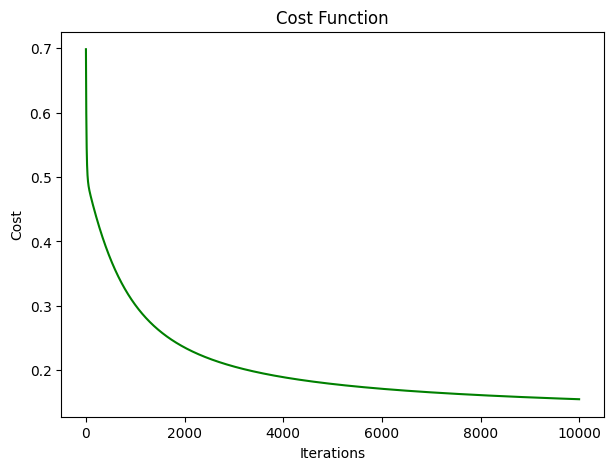

In [ ]:
# Plotting the cost function
plt.figure(figsize=(7, 5))
plt.plot(range(len(costs)), costs, color = 'green')
plt.title("Cost Function")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()

Now to predict we implement the following function that takes multiple examples in one numpy array x, and the parameters a, and gives back the prediction made for each example.
<br>**Reminder:** If the output of the sigmoid function is >0.5, we consider the output is 1, otherwise, we consider it 0

In [ ]:
def predict_smoker(x, a):

  x = np.c_[np.ones((x.shape[0], 1)), x]

  probabilities = sigmoid(np.dot(x, a))

  # Apply the threshold: if probability > 0.5, classify as 1 (smoker), otherwise 0
  result = (probabilities > 0.5).astype(int)

  return result

Make predictions on your test data using the predict_smoker: Compute the predictions associated with your test set

In [ ]:
predicted_smokers = predict_smoker(x_test, final_a)

# Displaying the predictions
print("Predictions on the test set:", predicted_smokers)


Predictions on the test set: [0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0
 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0
 0 1 1 0 0 0 0 0]


##Classifier Evaluation

Now you will evaluate your classifier

###Accuracy Score

Compute the accuracy score of your classifier

In [ ]:
# Computing the Accuracy score of the classifier
accuracy = np.mean(predicted_smokers == y_test)
print(accuracy)

0.9063670411985019


###Confusion Matrix

Compute the decision matrix for your classifier

In [ ]:
# Computing the confusion matrix of the classifier

# True Positives (TP)
TP = np.sum((y_test == 1) & (predicted_smokers == 1))

# True Negatives (TN)
TN = np.sum((y_test == 0) & (predicted_smokers == 0))

# False Positives (FP)
FP = np.sum((y_test == 0) & (predicted_smokers == 1))

# False Negatives (FN)
FN = np.sum((y_test == 1) & (predicted_smokers == 0))

# Displaying the confusion matrix
confusion_matrix = np.array([[TN, FP], [FN, TP]])

print("Confusion Matrix:")
print(confusion_matrix)



Confusion Matrix:
[[199   3]
 [ 22  43]]
